In [1]:
import bm

ModuleNotFoundError: No module named 'bm'

# 机器学习数学理论与底层实现

机器学习： 一种不需要明确编程就能让计算机学习的研究领域
机器学习种类:
	1. supervised learning（监督学习）: 是指学习x到y 或者 输入到输出映射的算法。对于给定的输入(input variable/feature) x，标上正确的标签y (output/target variable)，通过学习正确的输入x和期望的输出y（训练样本training example （x, y））， 得到模型函数 f ，算法最终能够只接受输入，而不需要接受输出标签，就能给出合理准确的输出预测或猜测 $\hat y$ 。主要有两类：回归（Regression，预测连续值），和分类（classification，预测有限类别）
	svm, neural network. the machine learning task of inferring a function from labeled training data. divided into classification (descrete labels) and regression (continuous labels)
	2. unsupervised learning（无监督学习）: 在无监督学习中，数据只有输入x，但是没有输出标签y。而我们的算法必须找到数据中一些结构、模式或一些有趣的东西。clustering (聚类 K neighbor),  异常检测（Anomaly detection）， EM algorithm, PCA 降维（Dimensionality reduction）。
	3. Semi-supervised learning
	4. reinforcement learning

## 线性回归（linear regression）
定义回归模型（model, univarient regression）: $f_\theta(x)=\theta_0+\theta_1x$  $\;\;\;\;\;\;$ 【一次线性模型，$\theta_0$为斜率（slope）， $\theta_0$为截距（intercept）】  
其中参数（parameter）为 $\theta$， x 为输入变量或输入特征(input variable/features)， y 为输出变量或目标变量(output variable/target variable)  

**目标函数**（cost/objective function）: $E(\theta)$ 和正则项也可以同时额外除以 n（取平均），此处目标函数图像为碗型（convex），存在一个全局最优（小）解 $$E(\theta)=\frac{1}{2}\sum^n_{i=1}\,(y^{(i)}-f_\theta(x^{(i)}))^2   \;\;\;\;\;\;\;\;\; L2正则项追加： +\frac \lambda 2 \sum^m_{j=1}\,\theta_j^2 \;\;\; (\lambda \;为正则项权重，控制过/欠拟合)$$
可以理解为目标函数为所有数据损失的平均值：$E(\theta)=\frac{1}{n}\sum^n_{i=1}\,L(f_\theta(x^{(i)}), y^{(i)})\; $   
其中单个数据的损失函数为（误差平方和）： $\;L(f_\theta(x^{(i)}), y^{(i)})=\frac{1}{2}(y^{(i)}-f_\theta(x^{(i)}))^2 $     


使用误差平方和的原因：可以从概率论中的中心极限定理、高斯分布等知识中找到解释。    
中心极限定理：设从均值为 $\mu$、方差为 $\sigma^2$（有限）的任意一个总体中抽取样本量为n的样本，当n充分大时，样本均值的抽样分布$\;\frac {Y_n}n\;$近似服从于均值为μ、方差为 σ2的正态分布（$Y_n$ 为随机变量之和）。  
高斯分布：假设给定一个输入样例 $\;x^{(i)}\;$ 根据公式得到预测值 $\pmb{ θ^T} \pmb x^{(i)}$ 与真实值$y^{(i)}$ 之间存在误差，即为 $ \epsilon^{(i)}$。关系为： $y^{(i)}=\bm θ^T\bm x^{(i)}+\epsilon^{(i)}\;$。根据中心极限定理，把那些对结果影响比较小的变量（假设独立同分布）之和 （$\epsilon$）认为服从正态分布 N(0,1) 是合理的。    
那么x和y的条件概率可表示为：$\;p(y^{(i)}\;|\;x^{(i)};\theta)=\frac 1 {\sqrt {2\pi}\sigma}exp(-\frac {(y^{(i)}-θ^T x^{(i)})^2}{2\sigma^2})$ ,   
似然函数(概率积)为：$max_\theta L(\theta)=\prod^m_{i=1} \frac 1 {\sqrt {2\pi}\sigma}exp(-\frac {(y^{(i)}-θ^T x^{(i)})^2}{2\sigma^2})\;\;$   
对L(x) 取对数，可得对数似然函数：$max_\theta l(\theta)=-m\log \sqrt {2\pi}\sigma-\frac 1 {2\sigma^2}\sum^m_{i=1} (y^{(i)}-θ^T x^{(i)})^2\;\;$  
由于n,$\sigma$都为常数，因此上式等价于:$\;\;min_\theta \frac 1 2 \sum^m_{i=1} (y^{(i)}-θ^T x^{(i)})^2$   
得到线性回归误差平方损失极小化与极大似然估计等价。 


求取使目标函数最小时的参数：可以使用最小二乘法（仅适用于线性回归，且参数多时求解效率低），或者使用梯度下降法。  
最小二乘法（Least Square Method）：目标函数 $E(\theta)=\frac{1}{2}\sum^n_{i=1}\,(y^{(i)}-f_\theta(x^{(i)}))^2=\frac{1}{2}(\bm X \bm \theta-\bm Y)^2,\;\;$  
对其求导：$\;\frac {\partial E(\bm \theta)}{\partial \bm \theta}=\bm X^T(\bm X \bm \theta - \bm Y)\;\;$ 令求导结果等于 0 矩阵，可得：$ \bm X^T\bm X \bm \theta=\bm X^T \bm Y$ ==> $\theta=(\bm X^T \bm X)^{-1}\bm X^T \bm Y$

**梯度下降法**（(batch) gradient descent）: 参数随机初始化（或者设置为0），不断使用所有训练数据的误差令更新参数(求最小值时，原参数值减去偏微分乘以学习率)，知道目标函数不再变化。对于多变量函数不能用普通的微分，而要用偏微分。其中 $\eta$ 为学习率（learning rate）。存在耗时长，容易陷入局部最优解的缺点。
    $$\theta_0:=\theta_0-\eta\frac{\partial E}{\partial \theta_0}, \;\;\;\;\; \theta_1:=\theta_1-\eta\frac{\partial E}{\partial \theta_1}$$
    令 $u=E(\theta), \;\;\;\;\; v=f_\theta(x), \;\;\;\;\; \frac{\partial u}{\partial \theta_0}=\frac{\partial u}{\partial v}\cdot\frac{\partial v}{\partial \theta_0},$
    $$\frac{\partial u}{\partial v}=\frac{\partial }{\partial v}(\frac{1}{2}\sum^n_{i=1}\,(y^{(i)}-v)^2)=\frac{1}{2}\sum^n_{i=1}\,(\frac{\partial }{\partial v}
    (y^{(i)^2}-2y^{(i)}v+v^2))=\sum^n_{i=1}\,(v-y^{(i)}),\;\;\;\;\;  \frac{\partial v}{\partial \theta_0}=\frac{\partial }{\partial \theta_0}(\theta_0+\theta_1 x)=1$$
    $$\frac{\partial u}{\partial \theta_0}=\frac{\partial u}{\partial v}\cdot\frac{\partial v}{\partial \theta_0}=\sum^n_{i=1}\,(v-y^{(i)})=\sum^n_{i=1}\,(f_\theta(x^{(i)})-y^{(i)})$$
    同理， $\frac{\partial v}{\partial \theta_1}=\frac{\partial }{\partial \theta_1}(\theta_0+\theta_1 x)=x, \;\;\;\;\; \frac{\partial u}{\partial \theta_1}=$
    $\frac{\partial u}{\partial v}\cdot\frac{\partial v}{\partial \theta_1}=\sum^n_{i=1}\,(v-y^{(i)})\cdot x^{(i)}=\sum^n_{i=1}\,(f_\theta(x^{(i)})-y^{(i)})x^{(i)}$ 
    $$\theta_0:=\theta_0-\eta\sum^n_{i=1}\,(f_\theta(x^{(i)})-y^{(i)}), \;\;\;\;\; \theta_1:=\theta_1-\eta\sum^n_{i=1}\,(f_\theta(x^{(i)})-y^{(i)})x^{(i)}$$

**多项式回归（Polynomial Regression）**：$$f_\theta(x)=\theta_0+\theta_1x+\theta_2x^2+\theta_3x^3+...+\theta_n x^n  \;\;\;\;\;【多项式模型，】$$  
多项式回归可以使用曲性来拟合数据，特征缩放更为重要。  
$$同理，\theta_j:=\theta_j-\eta\sum^n_{i=1}\,(f_\theta(x^{(i)})-y^{(i)})x^{(i)^j}   \;\;\;\;\;\;\;L2正则项\;(\;j\neq0时\;)\;追加：-\eta\lambda\theta_j $$
$ \Sigma \;$ 求和可以使用矩阵内积代替(Vectorization)： 
$$ \bm f_\theta = \bm X \bm \theta = \begin{bmatrix} 1 & x^{(1)} & x^{(1)^2} \\ 1 & x^{(2)} & x^{(2)^2} \\ 1 & x^{(3)} & x^{(1)^3}\\ \vdots \\ 1 & x^{(n)} & x^{(n)^2} \end{bmatrix} \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2  \end{bmatrix}= \begin{bmatrix} \theta_0+\theta_1x^{(1)^2}+\theta_2x^{(1)^2} \\ \theta_0+\theta_1x^{(2)^2}+\theta_2x^{(2)^2} \\ \vdots
\\ \theta_0+\theta_1x^{(n)^2}+\theta_2x^{(n)^2} \end{bmatrix}$$
$$\sum^n_{i=1}\,(f_\theta(x^{(i)})-y^{(i)})x^{(i)^j}=\bm f ^T \bm x_0= \begin{bmatrix} f_\theta(x^{(1)})-y^{(1)} \\ f_\theta(x^{(2)})-y^{(2)} \\ \vdots\\ f_\theta(x^{(n)})-yx^{(n)} \end{bmatrix}^T\begin{bmatrix} x_0^{(1)}\\ x_0^{(2)} \\ \vdots\\ x_0^{(n)} \end{bmatrix}$$
$$\bm \theta =\bm \theta-\eta \bm f ^T \bm X= \begin{bmatrix} \theta_0 & \theta_1 & \theta_2 \end{bmatrix}-\eta
\begin{bmatrix} f_\theta(x^{(1)})-y^{(1)} \\ f_\theta(x^{(2)})-y^{(2)} \\ \vdots\\ f_\theta(x^{(n)})-yx^{(n)} \end{bmatrix}^T \bm X  \;\;\;\;\;\;\;\; 其中 \; \bm X =\begin{bmatrix} \bm x_0 & \bm x_1 & \bm x_2 \end{bmatrix}= \begin{bmatrix} 1 & x^{(1)} & x^{(1)^2} \\ 1 & x^{(2)} & x^{(2)^2} \\ 1 & x^{(3)} & x^{(1)^3}\\ \vdots \\ 1 & x^{(n)} & 
x^{(n)^2} \end{bmatrix} $$

**多重回归**(multiple linear regression 多个变量)：

$$f_\theta(x)=\theta_0x_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n=\bm \theta^T \bm x, \;\;\;\;\; 其中 \; \bm \theta=\begin{bmatrix}
\theta_0\\ \theta_1\\ \theta_2\\ \vdots \\ \theta_n \end{bmatrix} \;\;\; \bm x=\begin{bmatrix}x_0\\ x_1\\ x_2\\ \vdots \\ x_n \end{bmatrix}
\;\;\; (x_0=1) $$
$$\frac{\partial u}{\partial \theta_j}=\frac{\partial u}{\partial v}\cdot\frac{\partial v}{\partial \theta_j},  \;\;\;\;\;
\frac{\partial v}{\partial \theta_j}=\frac{\partial }{\partial \theta_j}(\bm \theta^T\bm x)=x_j$$
$$\theta_j:=\theta_j-\eta\sum^n_{i=1}\,(f_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$
**随机梯度下降法**（sochastic gradient descent）：使用随机的一个训练数据(索引为 k)更新参数。更新快，不易陷入局部最优解。
$$\theta_j:=\theta_j-\eta(f_\theta(x^{(k)})-y^{(k)})x_j^{(k)}$$
**小批量梯度下降法**（mini-batch gradient descent）：使用随机的 m 个训练数据(索引集合为 K)更新参数。更新快，不易陷入局部最优解。
$$\theta_j:=\theta_j-\eta\sum_{k \in K}\,(f_\theta(x^{(k)})-y^{(k)})x_j^{(k)}$$
使用特征缩放（feature scaling）可以使线性回归梯度下降法快速地收敛（防止在细长的空间（ex: x1:0-5,x2:100-2000）内左右横跳），在特征间存在很大范围差异时尤为明显。有以下几种缩放方案：
1. 除以特征各自最大值； 
2. 均值标准化（mean normalization）: （特征当前值 - 特征均值）/ (特征最大值 - 特征最小值)
3. z-score 标准化：（特征当前值 - 特征均值）/ 特征标准差

使用学习曲线（learning curve）: 迭代次数 VS 目标函数， 或者当变化值小于阈值时停止训练（automatic convergence test）来确保梯度下降正常工作。学习曲线出现波浪时（有上升区间），可能存在程序错误或者学习率太大。
学习率选取： 学习率从小（0.001）到大实验一些数据， 3或10倍增大直到不能收敛， 再取比最小的不能收敛的学习率稍小的值。
特征工程（feature engineering）：使用经验，通过变形或合并旧特征来创造新特征。
    


Step 1: theta0 = 9.228, theta1 = 2.113, cost function diff = 76149.554
Step 2: theta0 = 17.627, theta1 = 3.940, cost function diff = 73134.032
Step 3: theta0 = 25.857, theta1 = 5.731, cost function diff = 70237.924
Step 4: theta0 = 33.923, theta1 = 7.486, cost function diff = 67456.503
Step 5: theta0 = 41.828, theta1 = 9.206, cost function diff = 64785.225
Step 6: theta0 = 49.574, theta1 = 10.891, cost function diff = 62219.730
Step 7: theta0 = 57.166, theta1 = 12.543, cost function diff = 59755.829
Step 8: theta0 = 64.605, theta1 = 14.162, cost function diff = 57389.498
Step 9: theta0 = 71.896, theta1 = 15.748, cost function diff = 55116.874
Step 10: theta0 = 79.041, theta1 = 17.303, cost function diff = 52934.246
Step 11: theta0 = 86.043, theta1 = 18.826, cost function diff = 50838.050
Step 12: theta0 = 92.906, theta1 = 20.319, cost function diff = 48824.863
Step 13: theta0 = 99.630, theta1 = 21.782, cost function diff = 46891.398
Step 14: theta0 = 106.221, theta1 = 23.216, cost func

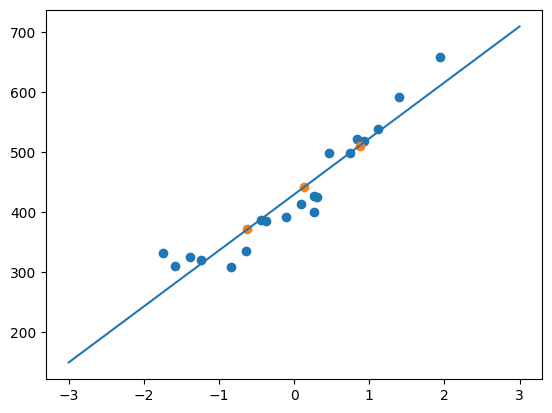

In [178]:
# Base Implementation of Linear Regression
import numpy as np
import matplotlib.pyplot as plt

train = np.loadtxt('data/click.csv', delimiter=',', skiprows=1)
train_x, train_y = train[:,0], train[:,1]

theta_0, theta_1 = np.random.rand(), np.random.rand()

def f(x):
    return theta_0 + theta_1*x

# cost function
def E(x, y):
    return 0.5 * np.sum((y - f(x))**2)

 # calculate z-score
avg, sd = train_x.mean(axis=0), train_x.std(axis=0)
def standardize(x):     
    return (x - avg) / sd

train_z = standardize(train_x)

plt.scatter(train_z, train_y)


learning_rate = 1e-3
diff = float('inf')
step = 0
err = E(train_z, train_y)
while abs(diff) > 1e-2 and step < 1e4:
    theta_0 -= learning_rate * np.sum(f(train_z) - train_y)
    theta_1 -= learning_rate * np.sum((f(train_z) - train_y) * train_z)
    cur_err = E(train_z, train_y)
    diff = err - cur_err
    err = cur_err
    step += 1
    print('Step {}: theta0 = {:.3f}, theta1 = {:.3f}, cost function diff = {:.3f}'.format(step, theta_0, theta_1, diff))
x = np.linspace(-3, 3, 100)
plt.plot(x, f(x))


test = [100, 150, 200]
test_z = standardize(np.array(test))
predict = f(test_z) 
plt.scatter(test_z, predict)
plt.show()


Step 1: theta0 = 429.000, theta1 = 93.446, cost function diff = 15356.436
Step 2: theta0 = 429.000, theta1 = 93.446, cost function diff = 13825.196
Step 3: theta0 = 429.000, theta1 = 93.446, cost function diff = 12455.061
Step 4: theta0 = 429.000, theta1 = 93.446, cost function diff = 11228.870
Step 5: theta0 = 429.000, theta1 = 93.446, cost function diff = 10131.294
Step 6: theta0 = 429.000, theta1 = 93.446, cost function diff = 9148.643
Step 7: theta0 = 429.000, theta1 = 93.446, cost function diff = 8268.688
Step 8: theta0 = 429.000, theta1 = 93.446, cost function diff = 7480.510
Step 9: theta0 = 429.000, theta1 = 93.446, cost function diff = 6774.353
Step 10: theta0 = 429.000, theta1 = 93.446, cost function diff = 6141.505
Step 11: theta0 = 429.000, theta1 = 93.446, cost function diff = 5574.185
Step 12: theta0 = 429.000, theta1 = 93.446, cost function diff = 5065.441
Step 13: theta0 = 429.000, theta1 = 93.446, cost function diff = 4609.064
Step 14: theta0 = 429.000, theta1 = 93.446

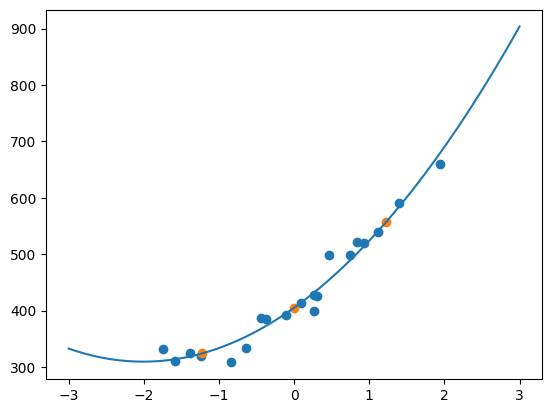

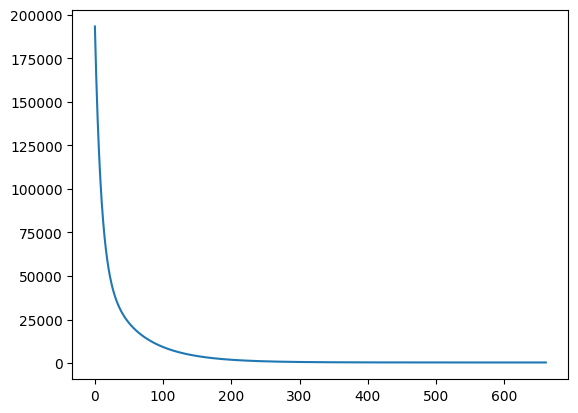

In [85]:
# polynomial regression (x, x^2, ...x^n term)
n = 2
# initialize parameter
theta = np.random.rand(n+1)   # add 1 for constant term, shape (3,)

def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x**2]).T

def f(x):
    return np.dot(x, theta)

X = to_matrix(train_z)

def MSE(x, y):
    return (1/x.shape[0]) * np.sum((y - f(x))**2)

diff, step = float('inf'), 0
err = []
err.append(MSE(X, train_y))

while abs(diff) > 1e-2 and step < 1e4:
    # gradiant decent
    # theta -= learning_rate * np.dot(f(X) - train_y, X)   

    # sochastic gradiant decent
    ind = np.random.permutation(X.shape[0])
    for x, y in zip(X[ind, :], train_y[ind]):
        theta -= learning_rate * (f(x) - y) * x

    err.append(MSE(X, train_y))
    diff = err[-2] - err[-1]
    step += 1
    print('Step {}: theta0 = {:.3f}, theta1 = {:.3f}, cost function diff = {:.3f}'.format(step, theta_0, theta_1, diff))
x = np.linspace(-3, 3, 100)
plt.scatter(train_z, train_y)
plt.plot(x, f(to_matrix(x)))

test = [100, 150, 200]
test_z = standardize(np.array(test))
predict = f(to_matrix(test_z))
plt.scatter(test_z, predict)
plt.show()

x = np.arange(len(err))
plt.plot(x, err)
plt.show()

Number 1 update: w = [-219.27408276 -261.69523912]
Number 2 update: w = [254.72591724 122.30476088]
Number 3 update: w = [  21.72591724 -307.69523912]
Number 4 update: w = [417.72591724  53.30476088]
Number 5 update: w = [  18.72591724 -379.69523912]
Number 6 update: w = [421.72591724 -39.69523912]
Number 7 update: w = [  42.72591724 -455.69523912]
Number 8 update: w = [ 305.72591724 -343.69523912]
Number 9 update: w = [701.72591724  17.30476088]
Number 10 update: w = [ 302.72591724 -415.69523912]
Number 11 update: w = [705.72591724 -75.69523912]
Number 12 update: w = [ 326.72591724 -491.69523912]
Number 13 update: w = [ 800.72591724 -107.69523912]
Number 14 update: w = [ 567.72591724 -537.69523912]
[1, -1]


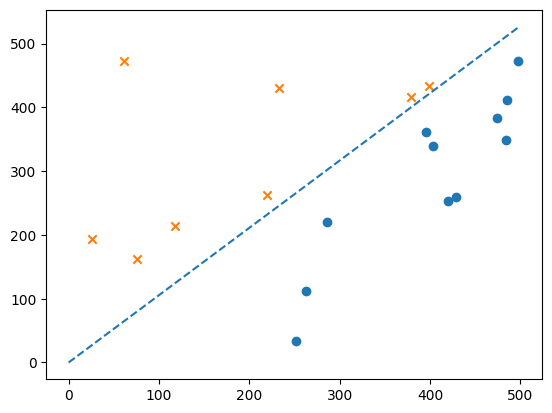

## 逻辑回归 (Logistic Regression)
对于分类问题，如果使用线性回归+阈值，会被异常值（outlier）严重影响分类结果。所以需要换个思路把分类作为类似概率来考虑。   
二分类（binary classification）： 把数据分成两类（class/category），常用类别为 yes/no, true/false, 1/0。
概率函数： $f_\theta(x)=\frac 1 {1+exp(-\bm \theta^T \bm x)} \;\;\;\;\;$ 其中 sigmoid/logistic 函数为： $\sigma (z)=\frac 1 {1+exp(-z)} \in (0,1)$    
条件概率： $ P(y=1|\bm x;\theta)= f_\theta(\bm x) \;\;\;\;\;$    对于给出 x， y = 1 的概率
判别函数为： $y=\begin{cases} 1 & (f_\theta(\bm x) \ge 0.5 \; \equiv \bm \theta^T \bm x \ge 0) \\ 0 & (f_\theta(\bm x)<0.5\;\equiv \bm \theta^T \bm x< 0) \end{cases} $    
决策边界（decision boundary）：用于数据分类的直线/平面。此处为： $\bm \theta^T \bm x= 0,\;\;$  其对应的 $f_\theta(\bm x)=0.5$。 $\bm \theta^T \bm x \ge 0 $  时预测为1，其余预测0。    
**目标函数**：如果仍然使用线性回归中的 $E(\theta)=\frac{1}{2}\sum^n_{i=1}\,(y^{(i)}-f_\theta(x^{(i)}))^2$， 其图像不再是碗形， 而是波浪状先递减，再递增，很多局部最小值，很难收敛到全局最小值。所以这个误差平方和函数不适用。   
$E(\theta)=\frac{1}{n}\sum^n_{i=1}\,L(f_\theta(x^{(i)}), y^{(i)}) \;\;\;$ (可以不除以 n )为了使目标函数仍然为碗形（convex），定义单个数据的损失函数为（需要最小化）：    
$$\;L(f_\theta(x^{(i)}), y^{(i)})= \begin{cases} -\log(f_\theta(\bm x^{(i)})) & if\;y^{(i)}=1 \\ -\log(1-f_\theta(\bm x^{(i)})) & if\;y^{(i)}=0 \end{cases}=-(y^{(i)}\log f_\theta(x^{(i)})-(1-y^{(i)})\log (1-f_\theta(x^{(i)}))) $$   
L2正则项追加： $+\frac \lambda {2n} \sum^m_{j=1}\,\theta_j^2 $  
使用似然函数解释：假定所有的训练数据都是互不影响、独立发生的，此时整体的概率可以用联合概率来表示(似然函数 likelihood)，需要最大化：
$$L(\bm \theta)=\prod^n_{i=1} P(y^{(i)}=1\;|\;x^{(i)})^{y^{(i)}}P(y^{(i)}=0\;|\;x^{(i)})^{1-y^{(i)}}$$
对于似然函数取对数（对数函数单调递增，不影响）：$\log L(\bm \theta)=\log \prod^n_{i=1} P(y^{(i)}=1\;|\;x^{(i)})^{y^{(i)}}P(y^{(i)}=0\;|\;x^{(i)})^{1-y^{(i)}}$    
$$=\sum^n_{i=1}\,(\log P(y^{(i)}=1\;|\;x^{(i)})^{y^{(i)}}+\log P(y^{(i)}=0\;|\;x^{(i)})^{1-y^{(i)}})=\sum^n_{i=1}\,(y^{(i)}\log P(y^{(i)}=1\;|\;x^{(i)})+(1-y^{(i)})\log P(y^{(i)}=0\;|\;x^{(i)}))$$
$$=\sum^n_{i=1}\,(y^{(i)}\log P(y^{(i)}=1\;|\;x^{(i)})+(1-y^{(i)})\log (1-P(y^{(i)}=1\;|\;x^{(i)})))=\sum^n_{i=1}\,(y^{(i)}\log f_\theta(x^{(i)})+(1-y^{(i)})\log (1-f_\theta(x^{(i)})))$$
对似然函数进行偏微分：$\frac{\partial \log L(\bm \theta)}{\partial \theta_j}=\frac{\partial}{\partial \theta_j}\sum^n_{i=1}\,(y^{(i)}\log f_\theta(x^{(i)})+(1-y^{(i)})\log (1-f_\theta(x^{(i)})))$   
令 $u=\log L(\bm \theta), \;\;\;$ $v=f_\theta(\bm x), \;\;\; \frac{\partial u}{\partial \theta_j}=\frac{\partial u}{\partial v}\cdot\frac{\partial v}{\partial \theta_j}$   
$$\frac{\partial u}{\partial v}=\frac{\partial}{\partial v}\sum^n_{i=1}\,(y^{(i)}\log (v)+(1-y^{(i)})\log (1-v))=\sum^n_{i=1}\,(\frac {y^{(i)}} v-\frac {1-y^{(i)}}{1-v})$$
sigmoid 函数的微分为：$\frac{\partial \sigma(x)}{\partial x}= \sigma(x)(1- \sigma(x)), \;\;\;$ 令 $z=\bm \theta^T \bm x, \;\;\;\;\; \frac{\partial v}{\partial \theta_j}=\frac{\partial v}{\partial z}\cdot\frac{\partial z}{\partial \theta_j}=v(1-v)\frac{\partial}{\partial \theta_j}(\theta_0x_0+\theta_1x_1+...+\theta_nx_n)=v(1-v)\cdot x_j$    
$$\frac{\partial u}{\partial \theta_j}=\frac{\partial u}{\partial v}\cdot\frac{\partial v}{\partial \theta_j}=\sum^n_{i=1}\,(\frac {y^{(i)}} v-\frac {1-y^{(i)}}{1-v})\cdot v(1-v)\cdot x_j^{(i)}=\sum^n_{i=1}\,(y^{(i)}-y^{(i)}v-v+y^{(i)}v)x_j^{(i)}=\sum^n_{i=1}\,(y^{(i)}-f_\theta(x^{(i)}))x_j^{(i)}$$
调整减数被减数位置，参数的更新表达式（统一最小化）：$\theta_j:=\theta_j-\eta\sum^n_{i=1}\,(f_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$    
$（L2正则项\;(\;j\neq0时\;)\;追加：-\eta\lambda\theta_j）$  减数项可额外取平均（除以n）

$$\bm \theta =\bm \theta-\eta \bm f ^T \bm X= \begin{bmatrix} \theta_0 & \theta_1 & \theta_2 \end{bmatrix}-\eta
\begin{bmatrix} f_\theta(x^{(1)})-y^{(1)} \\ f_\theta(x^{(2)})-y^{(2)} \\ \vdots\\ f_\theta(x^{(n)})-yx^{(n)} \end{bmatrix}^T \bm X  \;\;\;\;\;\;\;\; 其中 \; \bm X =\begin{bmatrix} \bm x_0 & \bm x_1 & \bm x_2 \end{bmatrix}= \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)}\\ \vdots \\ 1 & x_1^{(n)} & 
x_2^{(n)} \end{bmatrix} $$
逻辑回归中处理线性不可分时， 只需要在原有一次向量 $\bm x$ 中插入高次向，就可以使决策边界变为曲线/面，使得可以预测线性不可分问题。

Number 1 update: w = [ 567.72591724 -537.69523912]
Number 2 update: w = [ 567.72591724 -537.69523912]
Number 3 update: w = [ 567.72591724 -537.69523912]
Number 4 update: w = [ 567.72591724 -537.69523912]
Number 5 update: w = [ 567.72591724 -537.69523912]
Number 6 update: w = [ 567.72591724 -537.69523912]
Number 7 update: w = [ 567.72591724 -537.69523912]
Number 8 update: w = [ 567.72591724 -537.69523912]
Number 9 update: w = [ 567.72591724 -537.69523912]
Number 10 update: w = [ 567.72591724 -537.69523912]
Number 11 update: w = [ 567.72591724 -537.69523912]
Number 12 update: w = [ 567.72591724 -537.69523912]
Number 13 update: w = [ 567.72591724 -537.69523912]
Number 14 update: w = [ 567.72591724 -537.69523912]
Number 15 update: w = [ 567.72591724 -537.69523912]
Number 16 update: w = [ 567.72591724 -537.69523912]
Number 17 update: w = [ 567.72591724 -537.69523912]
Number 18 update: w = [ 567.72591724 -537.69523912]
Number 19 update: w = [ 567.72591724 -537.69523912]
Number 20 update: w =

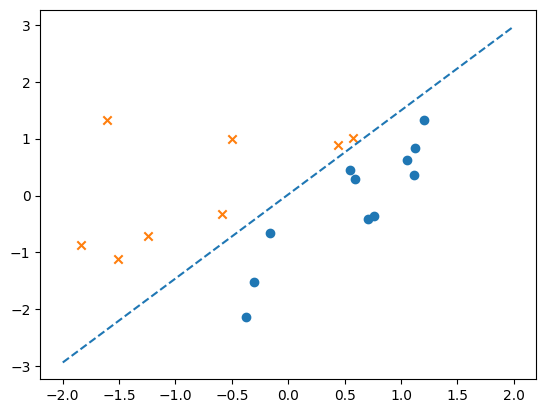

In [226]:
# Logistic Regression (Linear Separable Data)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv('data/image_size.csv', delimiter=',', skiprows=1)
train_x = train.iloc[:,0:2]
train_y = train.iloc[:,-1].map({1: 1, -1: 0})   

theta = np.random.rand(3)
learning_rate = 1e-3
epoch, count = 5000, 0

avg, sd = train_x.mean(axis=0), train_x.std(axis=0)
def standardize(x):     
    return (x - avg) / sd

def to_matrix(x):
    return np.hstack([np.ones((x.shape[0], 1)), x])

def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))


train_z = standardize(train_x)
X = to_matrix(train_z)

# while abs(diff) > 1e-2 and step < 1e4:
for _ in range(epoch):
    # gradiant decent
    theta -= learning_rate * np.dot(f(X) - train_y, X)   
    count += 1  
    print('Number {} update: theta = {}'.format(count, theta))

def classify(x):
    return (f(x) >= 0.5)

test = pd.DataFrame([[200,100],[100,200],[300,100]],columns=train_x.columns)
print(classify(to_matrix(standardize(test))))

z = pd.DataFrame(train_z)
plt.scatter(z[train_y==1].iloc[:,0], z[train_y==1].iloc[:,1],marker='o')  # horizontal image
plt.scatter(z[train_y==0].iloc[:,0], z[train_y==0].iloc[:,1],marker='x')  # vertical image
x = np.linspace(-2, 2, 100)
plt.plot(x, -(theta[0] + theta[1] * x) / theta[2], linestyle='dashed')
plt.show()


Number 1 update: theta = [0.05173628 0.08295576 0.87241531 0.64198346]
Number 2 update: theta = [0.04636923 0.08787155 0.85142204 0.63661645]
Number 3 update: theta = [0.04106172 0.09275021 0.83055853 0.63134039]
Number 4 update: theta = [0.0358191  0.09758603 0.80982205 0.62616745]
Number 5 update: theta = [0.03062428 0.10238356 0.78921721 0.62106899]
Number 6 update: theta = [0.0254929  0.1071398  0.76874642 0.61607114]
Number 7 update: theta = [0.02040733 0.11185426 0.74840896 0.61115174]
Number 8 update: theta = [0.01538419 0.116528   0.72821005 0.60633004]
Number 9 update: theta = [0.01041715 0.12116254 0.70814499 0.60160082]
Number 10 update: theta = [0.00551151 0.12575309 0.68822276 0.59697335]
Number 11 update: theta = [6.58186873e-04 1.30300958e-01 6.68436796e-01 5.92439158e-01]
Number 12 update: theta = [-0.00413915  0.13480674  0.64879278  0.587999  ]
Number 13 update: theta = [-0.00888769  0.13927339  0.62928933  0.58363987]
Number 14 update: theta = [-0.01357831  0.1436972

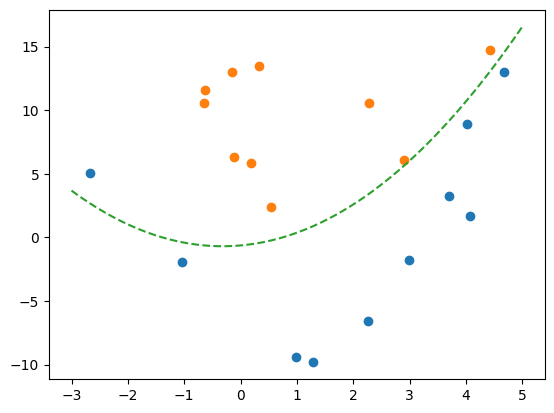

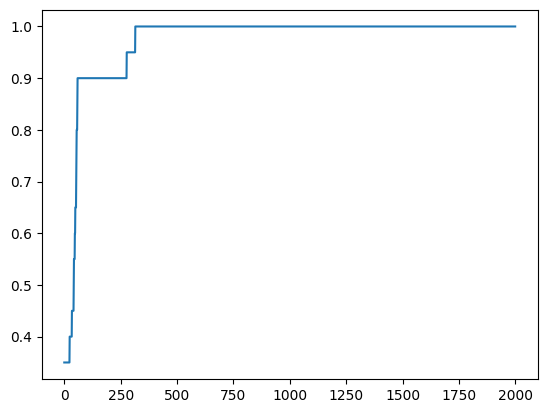

In [42]:
# Logistic Regression (Linear Separable Data)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#train = pd.read_csv('data/image_size2.csv', delimiter=',', skiprows=1)
# train_x = train.iloc[:,0:2]
# train_y = train.iloc[:,-1]
train = np.loadtxt('data/image_size2.csv', delimiter=',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]

theta = np.random.rand(4)
learning_rate = 1e-3
epoch, count = 2000, 0

avg, sd = train_x.mean(axis=0), train_x.std(axis=0)
def standardize(x):     
    return (x - avg) / sd

def to_matrix(x):
    if isinstance(x, pd.DataFrame):
        x = x.to_numpy()
    x3 = x[:,0,np.newaxis] ** 2   # add column with value of column 0 square
    
    return np.hstack([np.ones((x.shape[0], 1)), x,x3])

def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

train_z = standardize(train_x)
X = to_matrix(train_z)
accuracy = []

# while abs(diff) > 1e-2 and step < 1e4:
for _ in range(epoch):
    # gradiant decent
    theta -= learning_rate * np.dot(f(X) - train_y, X)   

    # sochastic gradiant decent
    ind = np.random.permutation(X.shape[0])
    for x, y in zip(X[ind, :], train_y[ind]):
        theta -= learning_rate * (f(x) - y) * x

    result = classify(X) == train_y
    acc = len(result[result == True]) / len(result)
    accuracy.append(acc)
    count += 1  
    print('Number {} update: theta = {}'.format(count, theta))

def classify(x):
    return (f(x) >= 0.5)

# test = pd.DataFrame([[200,100],[100,200],[300,100]],columns=train_x.columns)
# print(classify(to_matrix(standardize(test))))

# z = pd.DataFrame(train_z)
# plt.scatter(z[train_y==1].iloc[:,0], z[train_y==1].iloc[:,1],marker='o')  # horizontal image
# plt.scatter(z[train_y==0].iloc[:,0], z[train_y==0].iloc[:,1],marker='x')  # vertical image
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'o')
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], 'o')
x = np.linspace(-3, 5, 100)
plt.plot(x, -(theta[0] + theta[1] * x + theta[3] * x ** 2) / theta[2], linestyle='dashed')
plt.show()

x = np.arange(len(accuracy))
plt.plot(x, accuracy)
plt.show()

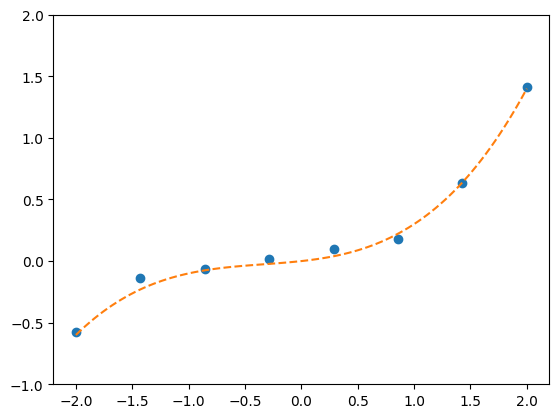

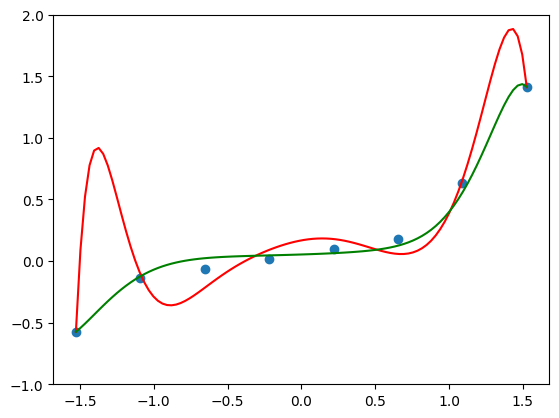

In [85]:
# Regularization
import numpy as np
import matplotlib.pyplot as plt

# Real function
def g(x):
    return 0.1 * (x ** 3 + x ** 2 + x)

train_x = np.linspace(-2, 2, 8)
train_y = g(train_x) + np.random.randn(train_x.size) * 0.05

x = np.linspace(-2, 2, 100)
plt.plot(train_x, train_y, 'o')
plt.plot(x, g(x), linestyle='dashed')
plt.ylim(-1, 2)
plt.show()

# fit with order 10 polynomial function
avg, sd = train_x.mean(), train_x.std()

def standardize(x):
    return (x - avg) / sd

def to_matrix(x):
    return np.vstack([x**i for i in range(11)]).T

# prediction function
def f(x):
    return np.dot(x, theta)

# cost function
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

train_z = standardize(train_x)
X = to_matrix(train_z)
theta = np.random.randn(X.shape[1])
learning_rate = 1e-4
diff = 10
error = E(X, train_y)
while abs(diff) > 1e-6:
    theta = theta - learning_rate * np.dot(f(X) - train_y, X)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error
theta1 = theta

x = np.linspace(-2, 2, 100)
z = standardize(x)
plt.plot(train_z, train_y, 'o')
theta = theta1
plt.ylim(-1, 2)
plt.plot(z, f(to_matrix(z)), color='r')

# with L2 regularization
theta = np.random.randn(X.shape[1])
LAMBDA = 2
diff = 10
error = E(X, train_y)
while abs(diff) > 1e-6:
    reg_term = LAMBDA * np.hstack([0, theta[1:]])
    theta = theta - learning_rate * (np.dot(f(X) - train_y, X) + reg_term)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error
theta2 = theta


theta = theta2
plt.plot(z, f(to_matrix(z)), color='g')

plt.show()




## 感知机模型（Perceptron, 分类问题）
只能解决线性可分的问题。
二分类的决策边界（decision boundary分割线）是使权重（weight）向量 $\bm w$（同之前$\bm \theta$） 成为法线向量的直线。（分割线与权重向量垂直）  
直线的表达式为： $\bm w \cdot \bm x =\sum^n_{i=1}\,w_ix_i=0$   （两个向量的内积）<br>
或者： $\bm w \cdot \bm x =|w|\cdot |x|\cdot \cos \theta =0\;\;\;\;\;$   其中$\;|w|\;$ 为向量的长度
判别函数 $f_w(x)=\begin{cases} 1 & (w \cdot x \ge 0) \\ -1 & (w \cdot x < 0) \end{cases} $    
决策边界权重向量一侧内积为正（判断为1）， 另一侧内积为负（判断为-1）  
权重向量的更新表达式： $w:=\begin{cases} w+y^{(i)}x^{(i)} & (f_w(x^{(i)}) \neq y^{(i)}) \\ w & (f_w(x^{(i)}) =y^{(i)}) \end{cases} \;\;\;\;$
$y^{(i)}$ 值为 1 或 -1

In [ ]:
# Perceptron Classification (only Linear Separable Data)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
train = pd.read_csv('data/image_size.csv', delimiter=',', skiprows=1)
train_x = train.iloc[:,0:2]
train_y = train.iloc[:,-1]

w = np.random.rand(2)

def f(x):
    return 1 if np.dot(w, x) >= 0 else -1

epoch, count = 10, 0
for _ in range(epoch):
    for x, y in zip(train_x.to_numpy(), train_y.to_list()):
        if f(x) != y:
            w += y * x
            count += 1  
            print('Number {} update: w = {}'.format(count, w))

test = [[200, 100],[100,200]]
predict = [f(i) for i in test]
print(predict)

plt.scatter(train_x[train_y==1].iloc[:,0], train_x[train_y==1].iloc[:,1],marker='o')      # horizontal image
plt.scatter(train_x[train_y==-1].iloc[:,0], train_x[train_y==-1].iloc[:,1],marker='x')    # vertical image
x = np.arange(500)
plt.plot(x, -w[0] / w[1] * x, linestyle='dashed')
plt.show()

## 神经网络（深度学习）


AttributeError: module 'numpy' has no attribute 'arandom'